<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width=200"px" height="100px" />

# PROYECTO TEMA 2


- Integrante 1: Castillo Fuhr Araceli Soledad

- Integrante 2: Ramírez Hinojosa Diana Laura


<img style="float: RIGHT; margin: 0px 0px 15px 15px;" src="https://profesionaljdeabajo.files.wordpress.com/2013/08/clima.png" width=400"px" height="200px" />

## 1.1 LA ENERGÍA SEGÚN EL ESTADO DE TIEMPO

<p style="text-align: justify;">Este proyecto se basará en la base de datos que el CENACE otorgó. El Centro Nacional de Control de Energía (CENACE) es un organismo público descentralizado cuyo objeto es ejercer el Control Operativo del Sistema Eléctrico Nacional.</p>

### 1.2 Objetivos.
#### 1.21 Objetivo general.
>  - Identificar si las variables del estado de tiempo deben ser consideradas en el pronóstico de la demanda de energía.
> #### 1.22 Objetivos específicos
>  - Determinar si la temperatura ponderada tiene una alta correlación con la demanda de energía.
>  - Establecer si la demanda de energía se ve afectada por la velocidad del viento ponderado.
>  - Precisar la relación entre la nubosidad y la demanda de energía
>  - Señalar si la demanda de energía y la lluvia son recíprocas

### 1.3 Definición del problema.
<p style="text-align: justify;"> El CENACE de occidente genera la energía necesaria para abastecer a nueve estados de la república. Debido a lo indispensable que es la energía para los mexicanos, este organismo público descentralizado debe ser capaz de abastecer la demanda de este insumo. El CENACE se enfrenta diariamente a tres posibles escenarios: </p>

>  - Que la producción de energía sea mayor a la demanda, generando pérdidas para la empresa.
>  - Que la demanda sea mayor a la producción de energía, dejando a muchas familias sin este recurso.
>  - Que la demanda y la producción sean equivalentes, que es lo ideal para este organismo. 

<p style="text-align: justify;">Es evidente entonces que es necesaria una producción acertada de la demanda. Para esto se utilizan modelos como regresiones. Pero el CENACE se encuentra ante un dilema: ¿Deben considerar, aparte de la información que la misma serie de datos otorga, las variables del estado del tiempo?</p>

<p style="text-align: justify;">Dicho lo anterior, el proyecto que a continución se desarrolla presentará cuatro nodos correspondientes a las cuatro variables del estado del tiempo que el CENACE cree que pueden ser relevantes en el prónistico de la demanda de energía</p>

<img src="Nodos.JPG">


### 1.4 Nodos y variables que se decidieron simular y porqué.
Como ya se mencionó en los objetivos y en la definición del problema, las variables que se decidieron simular son:
>  - Temperatura
>  - Lluvia
>  - Nubosidad
>  - Velocidad del viento

El problema que se abordará, analizando estas variables, es determinar si son modelables con algún tipo de distribución, para precisar si deben ser incluidas en el pronóstico de la gerencia del CENACE de Occidente, o si tomarlas en cuenta generaría únicamente ruido en el resultado.

## Supuestos 
>  - Partimos del supuesto de que el clima es predecible.

## Hipótesis iniciales 

> 1) Que las variables tienen una distribución normal con $$N(\mu, \sigma)$$

> 2) Que las variables son independientes.

> 3) Que las variables no están correlacionadas.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st   
import seaborn as sns
from sklearn.neighbors import KernelDensity
import pandas.plotting as cor

In [70]:
#Importación de la base de datos a utilizar 
data=pd.read_excel('Consumo.xlsx',index_col='fecha')

### Estimación de la demanda de energía 

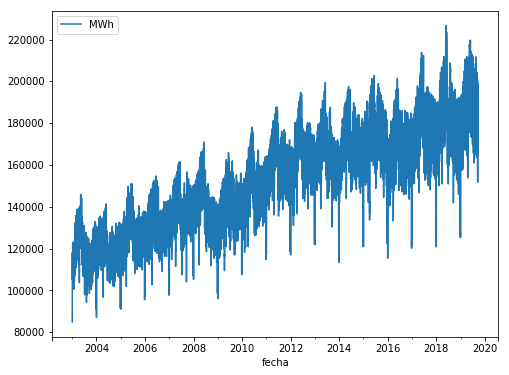

In [71]:
#Gráfica de la demanda de energía
data[['MWh']].plot(figsize=(8,6))

### Error actual
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="original.png"></td><td><img src="Pron original.png"> </td></tr></table>
 


## Prueba de independencia

#### H0= las variables de los 4 nodos son independientes.

#### Ha= las variables de los 4 nodos son dependientes.


In [72]:
x=st.chi2_contingency(data.iloc[:,3:7])
print ("Estadístico chi2 datos= ",x[0])

Chi_est = st.chi2.ppf(q = 0.95,df=x[2])
print('Estadístico de chi_cuadrado = ',Chi_est)

#No se cumple, se rechaza H0, se toma por supuesto que son independientes para analizarlas


Estadístico chi2 datos=  91147.31807016968
Estadístico de chi_cuadrado =  18640.018229348396


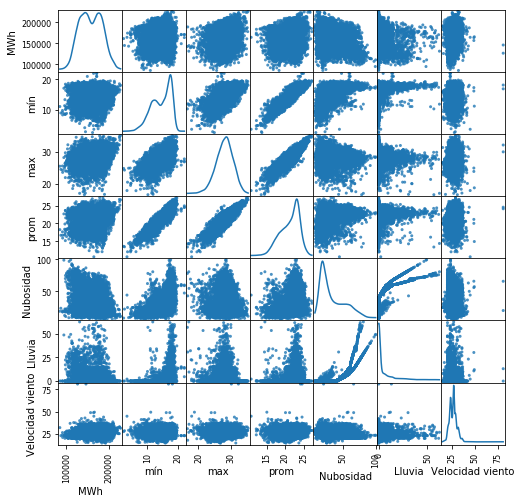

In [73]:
cor.scatter_matrix(data, diagonal='kde', alpha=0.8, figsize=(8,8));

In [74]:
data.corr()

,MWh,mín,max,prom,Nubosidad,Lluvia,Velocidad viento
MWh,1.000000,0.069936,0.242297,0.167424,-0.211515,-0.112484,0.239322
mín,0.069936,1.000000,0.573100,0.906840,0.636863,0.427999,-0.142616
max,0.242297,0.573100,1.000000,0.865103,-0.011558,-0.035259,-0.016449
prom,0.167424,0.906840,0.865103,1.000000,0.383870,0.243838,-0.095753
Nubosidad,-0.211515,0.636863,-0.011558,0.383870,1.000000,0.799633,-0.172958
Lluvia,-0.112484,0.427999,-0.035259,0.243838,0.799633,1.000000,-0.129246
Velocidad viento,0.239322,-0.142616,-0.016449,-0.095753,-0.172958,-0.129246,1.000000


# Variable 1: temperatura promedio

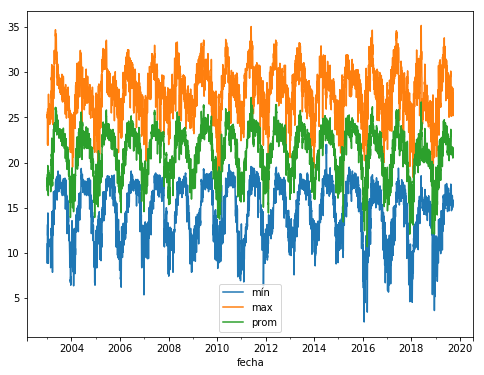

In [75]:
#Gráfica de los datos de la temperatura 
data[['mín','max','prom']].plot(figsize=(8,6))
plt.show()
#Definimos la variable a estimar
cambio_prom=data['prom']

### Hipótesis 1) La temperatura promedio se distribuye normalmente

#### Prueba Quantil Quantil

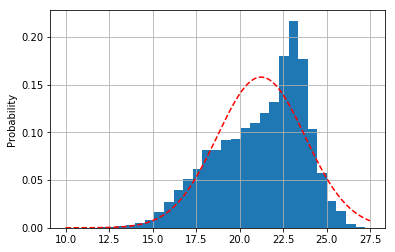

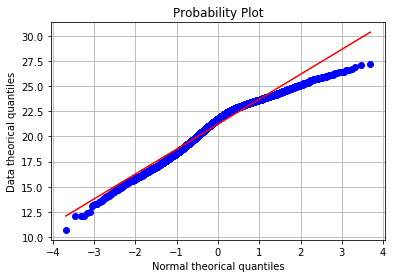

In [76]:
mup = np.mean(cambio_prom); sigmap =np.std(cambio_prom) 
J=30
plt.hist(cambio_prom,bins=J,density=True)
x = np.arange(10,27.5,.01)
y = st.norm.pdf(x,loc = mup, scale = sigmap)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_prom, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que las colas se alejan bastante de ser normal, sobretodo en la parte superior derecha.

#### Prueba Chi Cuadrada 

Valor de chi cuadrado librería =  1159739.9452678894
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  21.23022784301813 
Desviación estándar muestral =  2.5259963359599724
Power_divergenceResult(statistic=1159739.9452678894, pvalue=0.0)


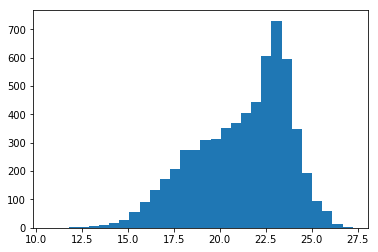

In [77]:
[freq,x,p]=plt.hist(cambio_prom,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
pi = st.norm.pdf(x,loc=mup,scale=sigmap)
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la temperatura sigue una distribución normal.


### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [78]:
from scipy import stats
dist_continu = [d for d in dir(stats) if isinstance(getattr(stats,d), stats.rv_continuous)]
del dist_continu[58]

In [79]:
def get_best_distribution(data):
    dist_names = dist_continu
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
print(get_best_distribution(cambio_prom))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:593: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 32.1250443268038.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 34.34740730227193.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 32.564268928367625.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 34.24906639489956.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the er

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.82571300605166.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.307901682083084.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 63.405316594605885.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.648960118208635.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 97.85745599202966.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 101.34626329472357.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 99.38454924138512.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 100.63848716554145.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 159.99955944795516.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 164.2493196880713.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 168.6263790980562.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 165.62619538384195.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 205.9127373532924.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 209.43603348654324.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 209.58725013501325.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 211.4451612731388.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 270.7823685792507.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 263.96520619359814.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 264.61216789897094.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 272.94618864403617.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 299.032063961356.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 299.86539012646284.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 300.34255510967057.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 301.4224512150065.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4767: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3260: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3262: RuntimeWarning: invalid value encountered in multiply
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3260: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value en

Best fitting distribution: skewnorm
Best p value: 5.79816809469357e-07
Parameters for the best fit: (-4.401087096054014, 24.399072178827144, 4.052444427628722)
('skewnorm', 5.79816809469357e-07, (-4.401087096054014, 24.399072178827144, 4.052444427628722))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La temperatura se distribuye como skewnorm 
#### Los parámetros se aproximan con máxima verosimilitud de python

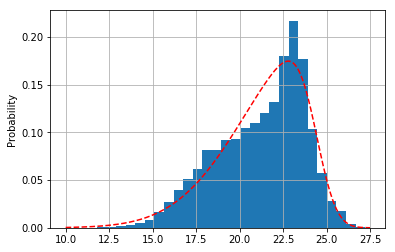

In [80]:
plt.hist(cambio_prom,bins=30,density=True)
x = np.arange(10,27.5,.01)
y = st.skewnorm.pdf(x, -4.401087096054014, 24.399072178827144, 4.052444427628722)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y por lo tanto se rechaza también la segunda hipótesis.

### Búsqueda de distribución para la temperatura con Kernel.

#### Lo que hace kernel es combinar dos o más posibles distribuciones ajustandola a tu variable.

In [81]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_prom[:, None])
#print (grid.best_params_)

GridSearchCV(cv=20, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': (0.1, 1.0, 30)}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

### Hipótesis 3) La temperatura se distribuye como un kernel-gaussiano 

#### Los parámetros se aproximan con máxima verosimilitud de python

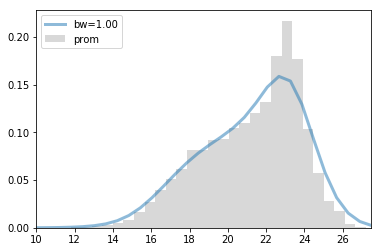

In [82]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
a = np.linspace(10,27.5,30)
pdf = np.exp(kde.score_samples(a[:, None]))
fig, ax = plt.subplots()
ax.plot(a, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_prom, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(10, 27.5);

#### Prueba de chi cuadrada

Valor de chi cuadrado librería =  31.14204584003663
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=31.14204584003663, pvalue=0.35875877802592926)


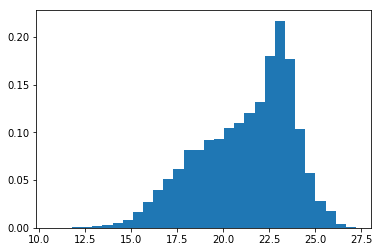

In [83]:
[freq,x,p]=plt.hist(cambio_prom,30,density=True)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = pdf
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
#print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

#### Aceptamos la hipótesis número 3 por chi cuadrada y p-value.

### La temperatura se distribuye como un Kernel Gaussiano.

#### Como la temperatura tiene una distribución entonces:

####   -  Supuesto: La temperatura puede ser modelada.

####   -  Hipótesis 4: Va a reducir el error del pronóstico de la demanda de energía.

####  -  Hipótesis 5: La temperatura máxima y mínima también pueden ser modeladas. 

####  -  Hipótesis 6: La temperatura máxima y mínima también reducirán el error de la demanda de energía.  


###   -  Hipótesis 4) Agregar la temperatura al modelo de pronóstico va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="Con prom.png"></td><td><img src="Pron prom.png"> </td></tr></table>
    
#### Sobre la regresión sí disminuyó el error, pero en el pronóstico no, por lo que se rechaza la hipótesis

### Hipótesis 5.1) La temperatura máxima también pueden ser modelada

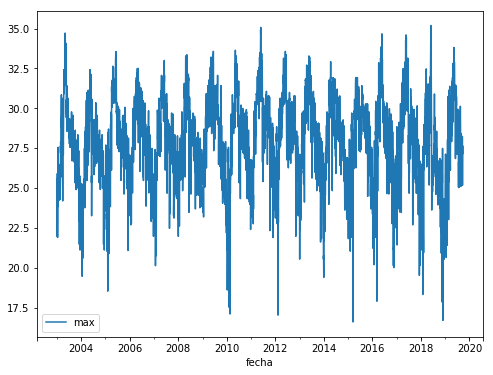

In [84]:
cambio_max=data['max']
data[['max']].plot(figsize=(8,6))
plt.show()
mum = np.mean(cambio_max); sigmam =np.std(cambio_max)

### Hipótesis 1) La Temperatura máxima se distribuye normalmente


#### Prueba Quantil-Quantil

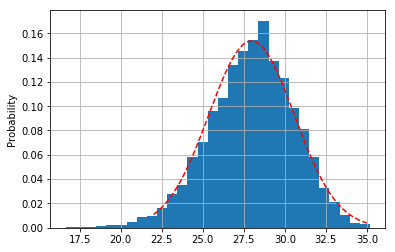

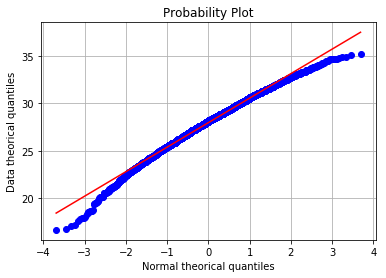

In [85]:
plt.hist(cambio_max,bins=30,density=True)
x = np.arange(22,35,.01)
y = st.norm.pdf(x,loc = mum, scale = sigmam)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_max, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que las colas se alejan

#### Prueba Chi-Cuadrada

Valor de chi cuadrado librería =  839002.0335959542
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  27.969249868229042 
Desviación estándar muestral =  2.5983219866618112
Power_divergenceResult(statistic=839002.0335959542, pvalue=0.0)


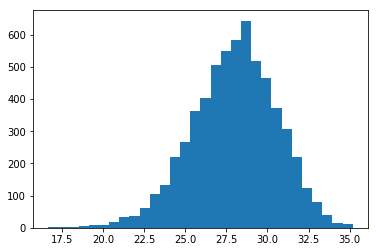

In [86]:
[freq,x,p]=plt.hist(cambio_max,30,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mum,scale=sigmam)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 30-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mum,'\nDesviación estándar muestral = ',sigmam)
print(X2)
# se rechaza normalidad

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la temperatura máxima sigue una distribución normal.

### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [87]:
print(get_best_distribution(cambio_max))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:593: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWa

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 60.53776277432934.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 57.61567588050491.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.59609315704782.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 62.950238003139276.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 109.62124021170632.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 108.97905748782938.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 104.41016013083723.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 107.22904849342942.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 168.6256686093269.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 172.79984408708384.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 175.3746661070453.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 169.52842037536473.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 244.40894348244495.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 242.77107046773455.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 247.4734934063015.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 247.71588957286912.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 298.62416823348644.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 297.67530120876205.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 290.5171902129798.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 290.5629744063723.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2276: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2159: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  

Best fitting distribution: skewnorm
Best p value: 0.4951154866240975
Parameters for the best fit: (-1.6056513792694562, 30.35865383956188, 3.529963820219808)
('skewnorm', 0.4951154866240975, (-1.6056513792694562, 30.35865383956188, 3.529963820219808))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La temperatura máxima se distribuye como Skewnorm
#### Los parámetros se aproximan con máxima verosimilitud de python

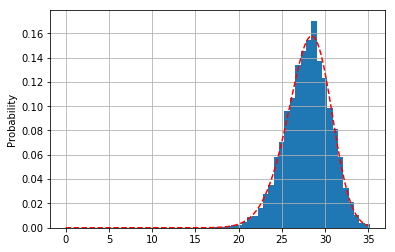

In [88]:
plt.hist(cambio_max,bins=30,density=True)
x = np.arange(0,35,.01)
y = st.skewnorm.pdf(x, -1.6056513792694562, 30.35865383956188, 3.529963820219808)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y el P-value es grande por lo tanto se acepta.

#### Se acepta la hipótesis 5.1) de que la temperatura máxima es modelable.

### Hipótesis 5.2) La temperatura mínima también pueden ser modelada

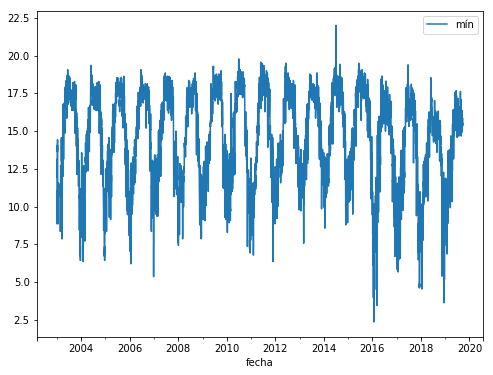

In [89]:
cambio_min=data['mín']
data[['mín']].plot(figsize=(8,6))
plt.show()
mumi = np.mean(cambio_min); sigmami =np.std(cambio_min)

### Hipótesis 1) La Temperatura mínima se distribuye normalmente


#### Prueba Quantil-Quantil

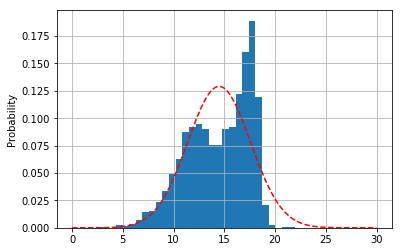

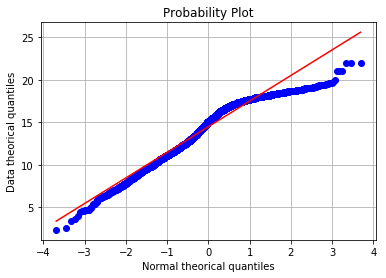

In [90]:
plt.hist(cambio_min,bins=30,density=True)
x = np.arange(0,30,.01)
y = st.norm.pdf(x,loc = mumi, scale = sigmami)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_min, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que las colas se alejan

#### Prueba Chi-Cuadrada

Valor de chi cuadrado librería =  1039432.1939836342
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  14.491205817807174 
Desviación estándar muestral =  3.092250667707837
Power_divergenceResult(statistic=1039432.1939836342, pvalue=0.0)


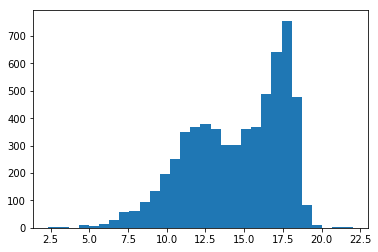

In [92]:
[freq,x,p]=plt.hist(cambio_min,30,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
n  = len(x)
pi = st.norm.pdf(x,loc=mumi,scale=sigmami)
Ei = n*pi
# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 30-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mumi,'\nDesviación estándar muestral = ',sigmami)
print(X2)
# se rechaza normalidad

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la temperatura máxima sigue una distribución normal.

### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [93]:
print(get_best_distribution(cambio_min))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:593: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.65.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang dis

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.394359791986865.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.19274660468158.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 31.154194934305238.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 28.334318577566457.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 60.65555941223673.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 58.30337278002895.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.124603544237345.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 63.56484614223703.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 105.16333336448106.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 100.42252352974322.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 103.62796876622505.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 105.24416298846296.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 168.27966712299047.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 167.91393950218185.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 170.52076518383228.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 172.09420706002055.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 222.75872211079843.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 231.9479632192528.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 234.37007819079798.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 239.91413115994874.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 287.12999187560735.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 292.59514542823854.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 294.9252105710329.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 289.07879654946373.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at 

Best fitting distribution: gengamma
Best p value: 4.1764827569778483e-19
Parameters for the best fit: (0.1916762542862331, 16.9697361837088, 2.1790099083453827, 16.3873792534974)
('gengamma', 4.1764827569778483e-19, (0.1916762542862331, 16.9697361837088, 2.1790099083453827, 16.3873792534974))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La temperatura mínima se distribuye como gengamma
#### Los parámetros se aproximan con máxima verosimilitud de python

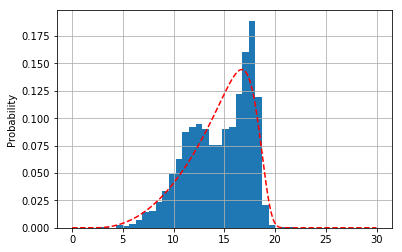

In [95]:
plt.hist(cambio_min,bins=30,density=True)
x = np.arange(0,30,.01)
y = st.gengamma.pdf(x, 0.1916762542862331, 16.9697361837088, 2.1790099083453827, 16.3873792534974)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y por lo tanto se rechaza también la segunda hipótesis.

### Búsqueda de distribución para la temperatura con Kernel.

#### Lo que hace kernel es combinar dos o más posibles distribuciones ajustandola a tu variable.

In [96]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_min[:, None])
#print (grid.best_estimator_)

GridSearchCV(cv=20, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': (0.1, 1.0, 30)}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

### Hipótesis 3) La lluvia se distribuye como un kernel-gaussiano 

#### Los parámetros se aproximan con máxima verosimilitud de python

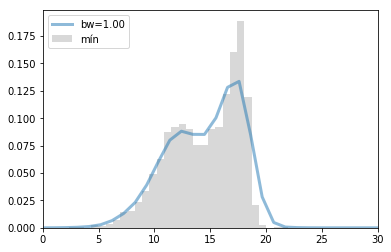

In [97]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
x = np.linspace(0,30,30)
pdf = np.exp(kde.score_samples(x[:, None]))
fig, ax = plt.subplots()
ax.plot(x, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_min, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-0, 30);

#### Prueba Chi Cuadrada

Valor de chi cuadrado librería =  10622771176.235537
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=10622771176.235537, pvalue=0.0)


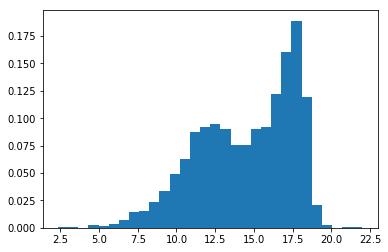

In [99]:
[freq,x,p]=plt.hist(cambio_min,30,density=True)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = pdf
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = 30-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
#print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

####  Se aplica la prueba de chi cuadrada y el P-value es chico por lo tanto no se acepta.

#### Se rechaza la hipótesis 5.2) de que la temperatura mínima es modelable.


###   -  Hipótesis 6.1)Agregar la temperatura máxima al modelo de pronóstico va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="max.png"></td><td><img src="Pron max.png"> </td></tr></table>
    
#### En la regresión sí baja el error pero en el pornóstico no, por lo que se rechaza la hipótesis

###   -  Hipótesis 6.2) Agregar la temperatura mínima al modelo de pronóstico va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="min.png"></td><td><img src="Pron min.png"> </td></tr></table>
    
#### Tanto en la regresión como en el pronóstico el error disminuye, por lo que se acepta la hipótesis

# Variable 2: Nubosidad

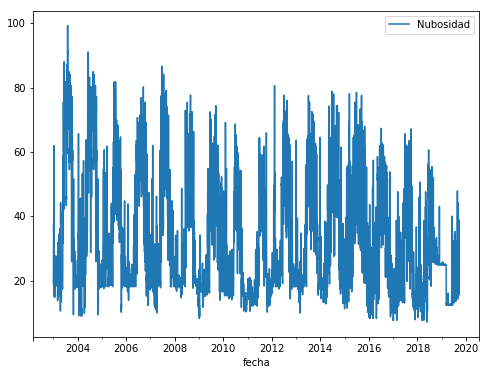

In [100]:
#Definimos la variable a utilizar de nubosidad
cambio_nubosidad=data['Nubosidad']
#Graficamos la variable de nubosidad 
data[['Nubosidad']].plot(figsize=(8,6))
plt.show()
mun = np.mean(cambio_nubosidad); sigman =np.std(cambio_nubosidad)   



### Hipótesis 1) La Nobusidad se distribuye normalmente

#### Prueba Quantil- Quantil

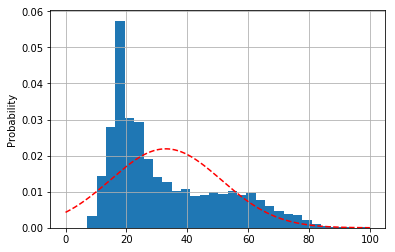

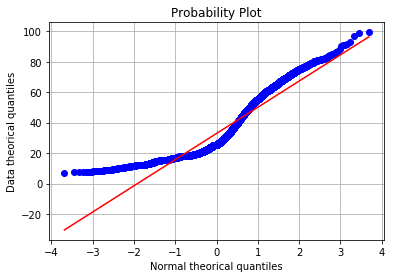

In [101]:
plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(0,100,.01)
y = st.norm.pdf(x,loc = mun, scale = sigman)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_nubosidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que las colas se alejan bastante de ser normal, sobretodo en la parte inferior izquierda.

#### Prueba Chi Cuadrada 

Valor de chi cuadrado librería =  6521666.23343216
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  32.93493580627912 
Desviación estándar muestral =  18.224760581367633
Power_divergenceResult(statistic=6521666.23343216, pvalue=0.0)


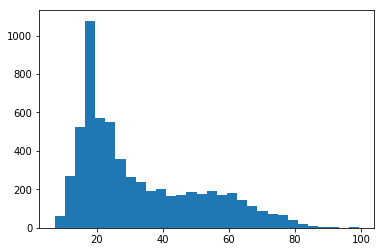

In [102]:
[freq,x,p]=plt.hist(cambio_nubosidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mun,scale=sigman)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mun,'\nDesviación estándar muestral = ',sigman)
print(X2)
# se rechaza normalidad

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la Nubosidad sigue una distribución normal.

### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [41]:
print(get_best_distribution(cambio_nubosidad))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\sta

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0615719348843466.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0537771704429755.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.087933912005984.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0778970331095574.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana

Best fitting distribution: exponnorm
Best p value: 2.1395483927627596e-19
Parameters for the best fit: (7.452702468413757, 13.253517250992985, 2.6408378049633994)
('exponnorm', 2.1395483927627596e-19, (7.452702468413757, 13.253517250992985, 2.6408378049633994))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La Nubosidad se distribuye como exponnorm
#### Los parámetros se aproximan con máxima verosimilitud de python

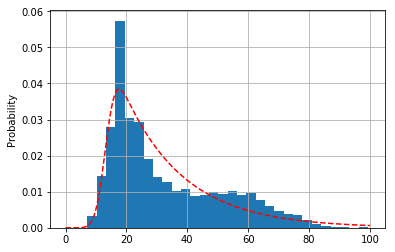

In [103]:
plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(-0,100,.01)
y = st.exponnorm.pdf(x, 7.452702468413757, 13.253517250992985, 2.6408378049633994)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y por lo tanto se rechaza también la segunda hipótesis.

### Búsqueda de distribución para la temperatura con Kernel.

#### Lo que hace kernel es combinar dos o más posibles distribuciones ajustandola a tu variable.

In [104]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_nubosidad[:, None])
print (grid.best_estimator_)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)


### Hipótesis 3) La Nubosidad se distribuye como un kernel-gaussiano 

#### Los parámetros se aproximan con máxima verosimilitud de python

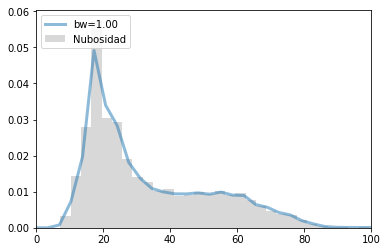

In [105]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
a = np.linspace(0,100,30)
pdf = np.exp(kde.score_samples(a[:, None]))
fig, ax = plt.subplots()
ax.plot(a, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_nubosidad, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 100);

#### Prueba de chi cuadrada

Valor de chi cuadrado librería =  3714842411.8338346
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=3714842411.8338346, pvalue=0.0)


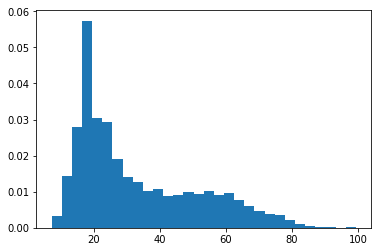

In [106]:
[freq,x,p]=plt.hist(cambio_nubosidad,30,density=True)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = pdf
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print(X2)

#### Rechazamos la hipótesis número 3 por chi cuadrada y p-value.

### La Nobusidad no tiene distribución.

#### Como la Nobosidad no tiene una distribución entonces:

####   -  Hipótesis: No va a reducir el error del pronóstico de la demanda de energía.

###   -  Hipótesis 4) Agregar la nubosidad al modelo de pronóstico no va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="nub.png"></td><td><img src="Pron nub.png"> </td></tr></table>
    
#### Tanto en la regresión como en el pronóstico el error aumenta, por lo que se acepta la hipótesis

# Variable 3: Velocidad del viento

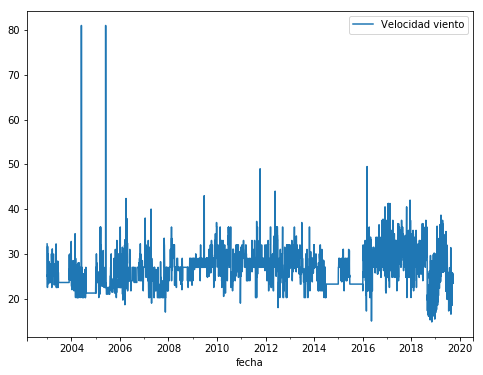

In [107]:
#Definimos la variable que vamos a modelar 
cambio_velocidad=data['Velocidad viento']
#Graficamos la variable a modelar
data[['Velocidad viento']].plot(figsize=(8,6))
plt.show()
muv = np.mean(cambio_velocidad); sigmav =np.std(cambio_velocidad)



### Hipótesis 1) La Velocidad del viento se distribuye normalmente


#### Prueba Quantil-Quantil

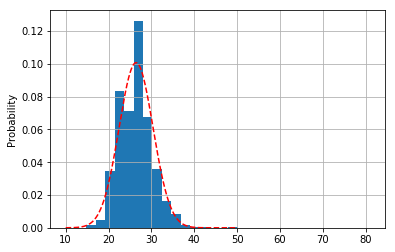

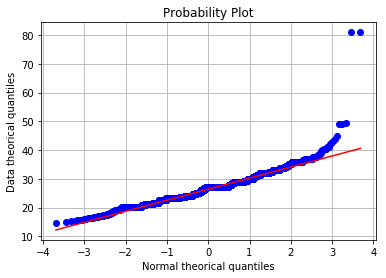

In [108]:
plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(10,50,.01)
y = st.norm.pdf(x,loc = muv, scale = sigmav)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que la cola superior derecha se aleja.

#### Prueba Chi Cuadrada 

Valor de chi cuadrado librería =  1.0933581959686168e+38
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  26.42214931223343 
Desviación estándar muestral =  3.96326091812156
Power_divergenceResult(statistic=1.0933581959686168e+38, pvalue=0.0)


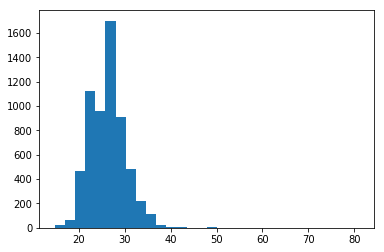

In [109]:
[freq,x,p]=plt.hist(cambio_velocidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=muv,scale=sigmav)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',muv,'\nDesviación estándar muestral = ',sigmav)
print(X2)
# se rechaza normalidad

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la Velocidad del viento sigue una distribución normal.

### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [47]:
print(get_best_distribution(cambio_velocidad))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, Run

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9932869283831345.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999489156616981.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9953284301927943.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9984606334316645.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9994118500708413.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999463901508603.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9994200574255228.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999395392446611.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991126778874972.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991121039759073.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991124865836339.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991121996278389.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana

Best fitting distribution: t
Best p value: 5.9337692753050115e-59
Parameters for the best fit: (9.976497082087349, 26.284949497390656, 3.4635808676871207)
('t', 5.9337692753050115e-59, (9.976497082087349, 26.284949497390656, 3.4635808676871207))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La Velocidad del viento se distribuye como t
#### Los parámetros se aproximan con máxima verosimilitud de python

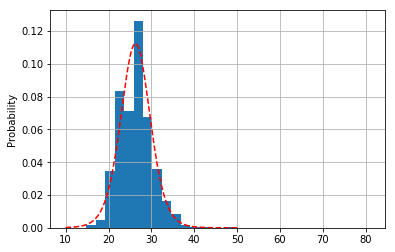

In [110]:
plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(10,50,.01)
y = st.t.pdf(x, 9.976497082087349, 26.284949497390656, 3.4635808676871207)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y por lo tanto se rechaza también la segunda hipótesis.

### Búsqueda de distribución para la temperatura con Kernel.

#### Lo que hace kernel es combinar dos o más posibles distribuciones ajustandola a tu variable.

In [111]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_velocidad[:, None])
#print (grid.best_estimator_)

GridSearchCV(cv=20, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': (0.1, 1.0, 30)}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

### Hipótesis 3) La Velocidad del viento se distribuye como un kernel-gaussiano 

#### Los parámetros se aproximan con máxima verosimilitud de python

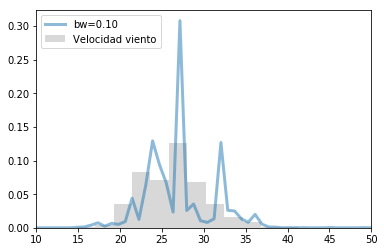

In [112]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
a = np.linspace(10,50,50)
pdf = np.exp(kde.score_samples(a[:, None]))
fig, ax = plt.subplots()
ax.plot(a, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_velocidad, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(10, 50);

#### Prueba Chi-Cuadrada

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Valor de chi cuadrado librería =  inf
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=inf, pvalue=0.0)


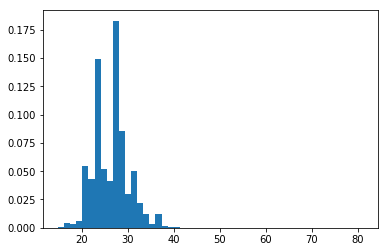

In [113]:
[freq,x,p]=plt.hist(cambio_velocidad,50,density=True)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
pi = pdf
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
#print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

#### Rechazamos la hipótesis número 3 por chi cuadrada y p-value.

### La Velocidad del viento no tiene distribución.

#### Como la Velocidad del viento no tiene una distribución entonces:

####   -  Hipótesis: No va a reducir el error del pronóstico de la demanda de energía.

###   -  Hipótesis 4) Agregar la velocidad del viento al modelo de pronóstico  NO va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="viento.png"></td><td><img src="Pron viento.png"> </td></tr></table>
    
#### Tanto en la regresión como en el pronóstico el error disminuye, por lo que se rechaza la hipótesis

# Variable 4: Lluvia

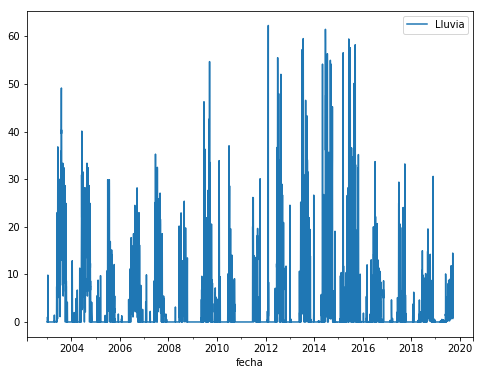

In [114]:
cambio_lluvia=data['Lluvia']
data[['Lluvia']].plot(figsize=(8,6))
plt.show()

mul = np.mean(cambio_lluvia); sigmal =np.std(cambio_lluvia)


### Hipótesis 1) La lluvia se distribuye normalmente

#### Prueba Quantil Quantil

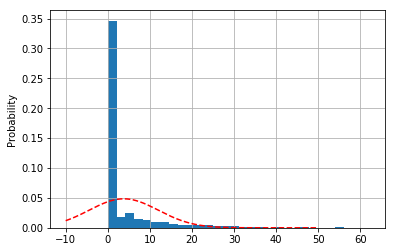

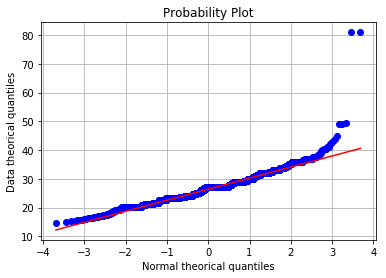

In [115]:
plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(-10,50,.01)
y = st.norm.pdf(x,loc = mul, scale = sigmal)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Podemos ver que la cola superior derecha se aleja.

#### Prueba Chi Cuadrada 

Valor de chi cuadrado librería =  489353071329.36554
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  3.7897033675149405 
Desviación estándar muestral =  8.225208458116327
Power_divergenceResult(statistic=489353071329.36554, pvalue=0.0)


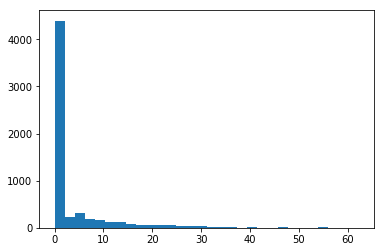

In [116]:
[freq,x,p]=plt.hist(cambio_lluvia,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
pi = st.norm.pdf(x,loc=mul,scale=sigmal)
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mul,'\nDesviación estándar muestral = ',sigmal)
print(X2)
# se rechaza normalidad

#### No pasa la prueba de normalidad con chi cuadrada por lo tanto, rechazamos la hipótesis de que la Velocidad del viento sigue una distribución normal.

### Busqueda de la mejor distribución dentro del paquete de distribuciones continuas de stats.

In [76]:
print(get_best_distribution(cambio_lluvia))

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Usuario\Anaconda3\lib\site-packag

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.16571652424691397.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.23865882133895505.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.18169200474416664.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.22816949553030041.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape p

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3669184681031361.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.36667824349416756.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3669899491040679.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3671203740510215.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape para

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1380: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the prog

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuari

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuari

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

Best fitting distribution: alpha
Best p value: 0.0
Parameters for the best fit: (0.3989174499423094, -0.2219170643941606, 0.31619363283746127)
('alpha', 0.0, (0.3989174499423094, -0.2219170643941606, 0.31619363283746127))


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


### Hipótesis 2) La lluvia se distribuye como alpha
#### Los parámetros se aproximan con máxima verosimilitud de python

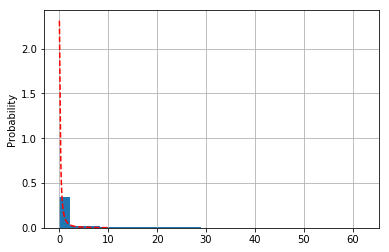

In [117]:
plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(0,10,.01)
y = st.alpha.pdf(x, 0.3989174499423094, -0.2219170643941606, 0.31619363283746127)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

####  Se aplica la prueba de kolmogorov-Smirnov y por lo tanto se rechaza también la segunda hipótesis.

### Búsqueda de distribución para la temperatura con Kernel.

#### Lo que hace kernel es combinar dos o más posibles distribuciones ajustandola a tu variable.

In [118]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_lluvia[:, None])
#print (grid.best_estimator_)

GridSearchCV(cv=20, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': (0.1, 1.0, 30)}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

### Hipótesis 3) La lluvia se distribuye como un kernel-gaussiano 

#### Los parámetros se aproximan con máxima verosimilitud de python

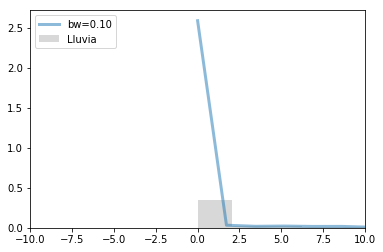

In [119]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
x = np.linspace(0,50,30)
pdf = np.exp(kde.score_samples(x[:, None]))
fig, ax = plt.subplots()
ax.plot(x, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_lluvia, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-10, 10);

Valor de chi cuadrado librería =  40469119602681.52
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=40469119602681.52, pvalue=0.0)


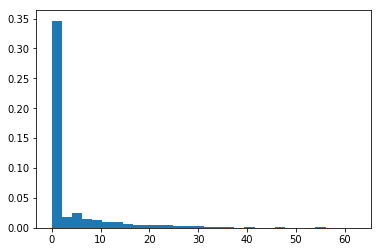

In [120]:
[freq,x,p]=plt.hist(cambio_lluvia,30,density=True)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
pi = pdf
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
#print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

#### Rechazamos la hipótesis número 3 por chi cuadrada y p-value.

### La lluvia no tiene distribución.

#### Como la lluvia no tiene una distribución entonces:

####   -  Supuesto: La lluvia no puede ser modelada.

####   -  Hipótesis: No va a reducir el error del pronóstico de la demanda de energía.

###   -  Hipótesis 4) Agregar la lluvia al modelo de pronóstico  NO va a reducir el error de la demanda de energía.
#### <center>Sobre regresión / Sobre pronóstico
<table><tr><td><img src="lluvia.png"></td><td><img src="Pron lluvia.png"> </td></tr></table>
    
#### Tanto en la regresión como en el pronóstico el error aumenta, por lo que se acepta la hipótesis

# Conclusiones generales

#### >  - Determinar si la temperatura ponderada tiene una alta correlación con la demanda de energía.

Sí hay una correlación alta entre la demanda de energía y la temperatura, sin embargo no es con la promedio, sino con la máxima.
#### >  - Establecer si la demanda de energía se ve afectada por la velocidad del viento ponderado.

Sí se ve afectada, ya que el error de pronóstico disminuye al agregar la velocidad del viento al modelo
#### >  - Precisar la relación entre la nubosidad y la demanda de energía

 Hay una correlación de -.21, sin embargo no es lo suficientemente importante como para mejorar el pronóstico de la demanda
#### >  - Señalar si la demanda de energía y la lluvia son recíprocas

La lluvia y la demanda no son recíprocas, la lluvia no mejora el pronóstico de la demanda al reducir su error

### Las variables que sí ayudan a reducir el error son la temperatura mínima y la velocidad del viento, ambas en conjunto ayudan a reducir el error en una mayor proporción que por separado, siendo la más importante la temperatura mínima. 

### La recomedación al CENACE es elaborar un modelo de pronóstico según las estaciones del año

<img src="Imagen1.png">

https://github.com/ramirezdiana/Proyecto-Simulacion-Tema2

https://github.com/AraceliCastillo/Proyecto-Simulacion-Tema2




### Referencia:
Quiénes Somos en “CENACE.GOB” 2019. Disponible en: https://www.cenace.gob.mx/CENACE.aspx [26 de octubre 2019]